# Stochastic Gradiant Descent

Reference: [Kaggle](https://www.kaggle.com/code/ryanholbrook/stochastic-gradient-descent/tutorial)

- how to train a neural netrwork?

### What do we need?

- training set - adjusting the weight
- testing set
- *loss function**
- *optimzer*

## Loss Function

- this is how we tell a network *what* problem to solve
- **loss function** measures the disparity between the target's true value and the value the model predicts
    - MSE
    - MAE
    - Huber loss
- during the training, the model will use the loss function as a guide for finding the correct values of its weights (lower loss is better)

## Optimizer - Stochastic Gradiant Descent (SGD)

- how to solve our problem
- the **optmizer** is an algorithm that adjust the weights to minimize the loss
- vistually all the optimization algorithms used in deep learning belong to a family called **stochastic gradiant descent** 
    - iterative algorithms that train a network in steps
    
One **step** of training goes like this:
1. Sample some training data and run it through the network to make prediction
2. Measure the loss between the prediction and the true values
3. Finally, adjust the weights in a direction that makes the loss smaller

Then just do this over and over until the loss is a small as you like.

Each iteration's sample of training data is called a minibatch (or often just "batch"), while a complete round of the training data is called an epoch. The number of epochs you train for is how many times the network will see each training example.

### Learning rate and Batch Size

- the **learning rate** is a number that determines the size of the shifts in the direction of each batch, 
- a small value means the networks need to see more minibatchers before its weights converge to their best values
- the learning rate and the size of the minibatches are the two parameters that have the largest effect on how the SGD training proceeds
- usually we use **Adam**, a SGD algorithm that has a adaptive learning rate that akes suitable for most problems without any parameter tuning (self tuning)

To add this to out model:

```
model.compile(
    optimizer="adam",
    loss="mae",
)
```

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

# Example

In [2]:
from IPython.display import display

red_wine = pd.read_csv('red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [3]:
print(f'Train: X->{X_train.shape}, y->{y_train.shape}')
print(f'Valid: X->{X_valid.shape}, y->{y_valid.shape}')

Train: X->(1119, 11), y->(1119,)
Valid: X->(480, 11), y->(480,)


In [4]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [5]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [6]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 1s 212ms/step - loss: 0.3805 - val_loss: 0.1406
Epoch 2/10
5/5 [==============================] - 0s 32ms/step - loss: 0.1405 - val_loss: 0.1361
Epoch 3/10
5/5 [==============================] - 0s 32ms/step - loss: 0.1262 - val_loss: 0.1261
Epoch 4/10
5/5 [==============================] - 0s 30ms/step - loss: 0.1212 - val_loss: 0.1256
Epoch 5/10
5/5 [==============================] - 0s 26ms/step - loss: 0.1161 - val_loss: 0.1096
Epoch 6/10
5/5 [==============================] - 0s 27ms/step - loss: 0.1157 - val_loss: 0.1105
Epoch 7/10
5/5 [==============================] - 0s 27ms/step - loss: 0.1073 - val_loss: 0.1038
Epoch 8/10
5/5 [==============================] - 0s 26ms/step - loss: 0.1054 - val_loss: 0.1034
Epoch 9/10
5/5 [==============================] - 0s 31ms/step - loss: 0.1063 - val_loss: 0.1046
Epoch 10/10
5/5 [==============================] - 0s 26ms/step - loss: 0.1017 - val_loss: 0.1022


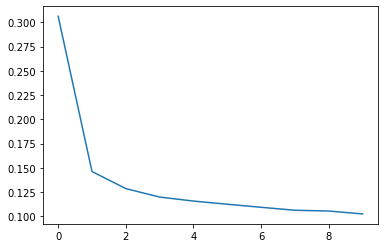

In [7]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

In [8]:
model.evaluate(X_valid,y_valid)  # loss on the validation set

15/15 [==============================] - 0s 4ms/step - loss: 0.1022


0.10224618762731552

In [9]:
from sklearn.metrics import mean_absolute_error

y_pred_valid = model.predict(X_valid)
mean_absolute_error(y_valid.values, y_pred_valid.reshape(1,-1)[0])   # loss on the validation set

0.10224617868661881

# Exercise

In [23]:
abalone = pd.read_csv('abalone.csv')
print(abalone.shape)

(4177, 9)


In [26]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

X = abalone.copy()
# Remove target
y = X.pop('Rings')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [10]


In [27]:
model = keras.Sequential([
    layers.Dense(2000, activation='relu', input_shape=input_shape),
    layers.Dense(2000, activation='relu'),    
    layers.Dense(100, activation='relu'),
    layers.Dense(1),
])

In [28]:
model.compile(optimizer='adam', loss='mae')

Experimenting with the values...

In [41]:
history = model.fit(
    X, y,
    batch_size=256,
    epochs=200,
)

Epoch 1/200
17/17 [==============================] - 1s 74ms/step - loss: 0.0675
Epoch 2/200
17/17 [==============================] - 1s 75ms/step - loss: 0.0744
Epoch 3/200
17/17 [==============================] - 1s 74ms/step - loss: 0.0755
Epoch 4/200
17/17 [==============================] - 1s 80ms/step - loss: 0.0756: 0s - loss
Epoch 5/200
17/17 [==============================] - 1s 77ms/step - loss: 0.0750
Epoch 6/200
17/17 [==============================] - 1s 86ms/step - loss: 0.0737
Epoch 7/200
17/17 [==============================] - 1s 80ms/step - loss: 0.0749
Epoch 8/200
17/17 [==============================] - 1s 80ms/step - loss: 0.0756
Epoch 9/200
17/17 [==============================] - 1s 88ms/step - loss: 0.0772
Epoch 10/200
17/17 [==============================] - 2s 96ms/step - loss: 0.0734
Epoch 11/200
17/17 [==============================] - 2s 89ms/step - loss: 0.0740
Epoch 12/200
17/17 [==============================] - 2s 90ms/step - loss: 0.0768
Epoch 13/200
1

Epoch 100/200
17/17 [==============================] - 1s 81ms/step - loss: 0.0621
Epoch 101/200
17/17 [==============================] - 1s 77ms/step - loss: 0.0632
Epoch 102/200
17/17 [==============================] - 1s 77ms/step - loss: 0.0635
Epoch 103/200
17/17 [==============================] - 1s 75ms/step - loss: 0.0638
Epoch 104/200
17/17 [==============================] - 1s 76ms/step - loss: 0.0613
Epoch 105/200
17/17 [==============================] - 1s 76ms/step - loss: 0.0613
Epoch 106/200
17/17 [==============================] - 1s 76ms/step - loss: 0.0609
Epoch 107/200
17/17 [==============================] - 1s 73ms/step - loss: 0.0625
Epoch 108/200
17/17 [==============================] - 1s 74ms/step - loss: 0.0614
Epoch 109/200
17/17 [==============================] - 1s 75ms/step - loss: 0.0642
Epoch 110/200
17/17 [==============================] - 1s 75ms/step - loss: 0.0627
Epoch 111/200
17/17 [==============================] - 1s 73ms/step - loss: 0.0636
Epoc

17/17 [==============================] - 1s 71ms/step - loss: 0.0570
Epoch 199/200
17/17 [==============================] - 1s 72ms/step - loss: 0.0557
Epoch 200/200
17/17 [==============================] - 1s 71ms/step - loss: 0.0552


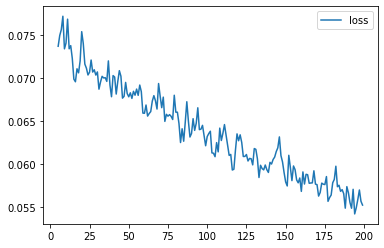

In [42]:
history_df = pd.DataFrame(history.history)
history_df.loc[5:, ['loss']].plot();